# MLX90632 TOR  REPORT

General template info
Authors: CEG

Release: B, July ,2020

Template purpose
This file performs the postcalculation of the TOR data .  It shows the device parameter informatiron vs specifications and lists a go or not go statement according to the agreed quality norms. 

Revisions will be updated in the heading.

In [1]:
#CEG:  General import statements
%reset -f

import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
import tkinter as tk
from tkinter import filedialog
import seaborn as sns # set plot style
import probscale
import datetime
import time
import json
clear_bkgd = {'axes.facecolor':'none', 'figure.facecolor':'none'}
sns.set(style='ticks', context='talk', color_codes=True, rc=clear_bkgd)


In [2]:
#inputdata = pd.read_csv('tordata', sep=',', na_values=['', "?"])

datafile='5s/1TD15705X2X1_Station2 5S_dm.csv'
#datafile1='1TD18764X2X3_Station1 Top_dm.csv'#inputdata['Datafile'].values[0]
#data_cols = ['station', 'inspection', 'recipe', 'lot', 'partid', 'key', 'value', 'result', 'unit', 'date_created', 'position', 'scanid', 'mintolerance', 'maxtolerance', 'toleranceusage', 'item', 'recipeid','pad_partid','pad_item','measurand_group_name', 'station_unique_id','inspectionstep','basicitemkey']

#CEG:  TOR Data
topdata = pd.read_csv(datafile, sep=',', na_values=['', "?"],  )
#sdata = pd.read_csv(datafile1, sep=',', na_values=['', "?"],  )
topdata.head(3)

,station,inspection,recipe,lot,partid,key,value,result,unit,date_created,...,maxtolerance,toleranceusage,item,recipeid,pad_partid,pad_item,measurand_group_name,station_unique_id,inspectionstep,basicitemkey
0,Station2 5S,Orientation,SFN 3x3 5L,1TD15705X2X1,0,MatchScore,93.73,Pass,Percent,2020-08-08 04:46:40,...,100.0,Low,Pattern 0°Pattern,NaN,NaN,NaN,MatchScore,05412646-1652-4091-82e8-99c2f734a923,Orientation,Pattern
1,Station2 5S,Orientation,SFN 3x3 5L,1TD15705X2X1,1,MatchScore,93.55,Pass,Percent,2020-08-08 04:46:41,...,100.0,Low,Pattern 0°Pattern,NaN,NaN,NaN,MatchScore,05412646-1652-4091-82e8-99c2f734a923,Orientation,Pattern
2,Station2 5S,Orientation,SFN 3x3 5L,1TD15705X2X1,11,MatchScore,98.90,Pass,Percent,2020-08-08 04:49:29,...,100.0,Low,Pattern 0°Pattern,NaN,NaN,NaN,MatchScore,05412646-1652-4091-82e8-99c2f734a923,Orientation,Pattern


In [9]:

    #Yield statistic

now = datetime.datetime.today().strftime('%Y-%m-%d')
when=time.strftime('%H:%M:%S')

insp_parts= set(topdata.partid)
topdata[(topdata["result"] != 'Pass')]
failed=topdata[(topdata["result"] != 'Pass')].partid.nunique()
failednum=topdata[(topdata["result"] != 'Pass')].measurand_group_name.unique()
len(insp_parts)


164

Inspection : Station2 5S
                                                                                 
                                                                                 
Report for lot 1TD15705X2X1
Data generated : 2020-08-20, 14:09:12
Data runned : 2020-08-08 04:46:41
                                                                                 
                                                                                 
Inspected parts = 164
Fails = 162
Top inspection yeld = 0.613
                                                                                 
                                                                                 
   BlobTotalAreaInPercent  Contact Length  Contact Width  Contact Gap1  \
0                     144               7             10             2   

   Contact Pitch  
0              1  


Text(0, 0.5, 'Quantity')

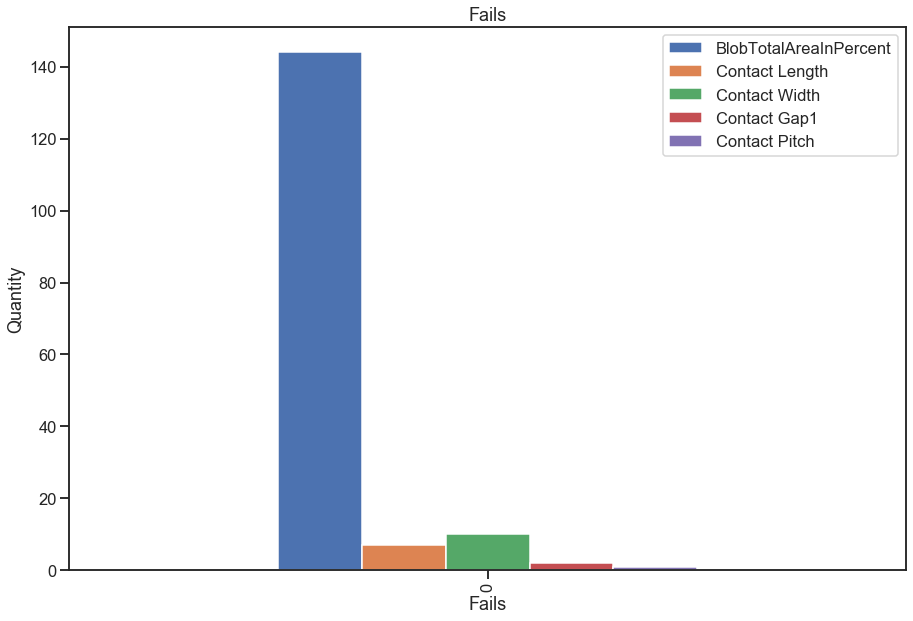

In [4]:
fails={}
for i in failednum :
    fail=topdata[(topdata["result"] != 'Pass')].measurand_group_name.str.count(i).sum()
    fails.update({(i):(fail)})



print('Inspection : ' + topdata.station[1])
print( "                                                                                 ")
print( "                                                                                 ")
print('Report for lot ' + topdata.lot[1] )
print('Data generated : '+ now +', '+ when)
print('Data runned : ' + str (topdata.date_created[1]))
print( "                                                                                 ")
print( "                                                                                 ")

print('Inspected parts = ' +  str(insp_parts ) )
print('Fails = ' +  str(failed ) )

yieldstat= ((insp_parts-failed)/ (insp_parts+failed))*100
print('Top inspection yeld = '  + str(yieldstat)[0:5])



print( "                                                                                 ")
print( "                                                                                 ")

df = pd.DataFrame(fails, index=[0])
print(df)
df.plot(kind="bar", figsize=(15,10));
pyplot.title("Fails")
pyplot.xlabel("Fails")
pyplot.ylabel("Quantity")




In [5]:
failednum=topdata[(topdata["result"] != 'Pass')].measurand_group_name.unique()

In [6]:
num=()
for i in failednum :
    num=topdata[(topdata["measurand_group_name"] == i)]
    print(i)
    print((topdata.value.describe()))
    print( "                                                                                 ")
    


BlobTotalAreaInPercent
count    4553.000000
mean      545.774150
std       871.680652
min        -0.002170
25%         9.590000
50%       260.000000
75%       282.300000
max      2974.500000
Name: value, dtype: float64
                                                                                 
Contact Length
count    4553.000000
mean      545.774150
std       871.680652
min        -0.002170
25%         9.590000
50%       260.000000
75%       282.300000
max      2974.500000
Name: value, dtype: float64
                                                                                 
Contact Width
count    4553.000000
mean      545.774150
std       871.680652
min        -0.002170
25%         9.590000
50%       260.000000
75%       282.300000
max      2974.500000
Name: value, dtype: float64
                                                                                 
Contact Gap1
count    4553.000000
mean      545.774150
std       871.680652
min        -0.002170
25%         9.590